In [1]:
# !pip install opendatasets
# !pip install -q kaggle
# !pip install --upgrade --force-reinstall --no-deps kaggle
# !pip install -U lightautoml==0.3.7.3

In [2]:
import sys
print(sys.version)

3.9.18 (main, Sep 11 2023, 13:41:44) 
[GCC 11.2.0]


In [3]:
# Standard python libraries
import os
import time

# Essential DS libraries
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import torch
import seaborn as sns
import matplotlib.pyplot as plt

from lightautoml.automl.presets.image_presets import TabularCVAutoML
from lightautoml.tasks import Task

,image_id,label,path
0,im3847.png,fearful,./data/train/fearful/im3847.png
1,im26_test.png,fearful,./data/train/fearful/im26_test.png
2,im769_test.png,fearful,./data/train/fearful/im769_test.png
3,im3526.png,fearful,./data/train/fearful/im3526.png
4,im3314.png,fearful,./data/train/fearful/im3314.png
...,...,...,...
35335,im2647.png,happy,./data/train/happy/im2647.png
35336,im51_test.png,happy,./data/train/happy/im51_test.png
35337,im4100.png,happy,./data/train/happy/im4100.png
35338,im4492.png,happy,./data/train/happy/im4492.png


In [6]:
# submission = pd.read_csv(INPUT_DIR + 'sample_submission.csv')
# submission['path'] = INPUT_DIR + 'test_images/' + submission['image_id']
# submission

In [7]:
# os.mkdir('./data/modified_train')

In [8]:
np.random.seed(1)
torch.set_num_threads(8)
INPUT_DIR = './data/'
train_data = pd.read_csv(INPUT_DIR + 'train_labels.csv')
train_data['path'] = INPUT_DIR + 'train/' + train_data['label'] + '/' + train_data['image_id']
train_data
from PIL import Image
from tqdm.notebook import tqdm
new_imgs = []

for i, p in tqdm(enumerate(train_data['path'].values)):
    if i % 1000 == 0:
        print(i)

    img = Image.open(p)

    for it in range(10):
        # new_img = img.rotate(np.random.rand() * 60 - 30, resample=3)
        # 
        # if np.random.rand() > 0.5:
        #     new_img = new_img.transpose(Image.FLIP_LEFT_RIGHT)

        new_img_name = './data/modified_train/' + p.split('/')[-1][:-4] + '_' + str(it) + '.png'
        # new_img.save(new_img_name)
        new_imgs.append([new_img_name, p.split('/')[-2], p.split('/')[-1]])

0it [00:00, ?it/s]

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000


In [9]:
train_data = pd.concat([train_data, pd.DataFrame(new_imgs, columns = ['path', 'label', 'image_id'])]).reset_index(drop = True)
train_data

,image_id,label,path
0,im3847.png,fearful,./data/train/fearful/im3847.png
1,im26_test.png,fearful,./data/train/fearful/im26_test.png
2,im769_test.png,fearful,./data/train/fearful/im769_test.png
3,im3526.png,fearful,./data/train/fearful/im3526.png
4,im3314.png,fearful,./data/train/fearful/im3314.png
...,...,...,...
388735,im6827.png,happy,./data/modified_train/im6827_5.png
388736,im6827.png,happy,./data/modified_train/im6827_6.png
388737,im6827.png,happy,./data/modified_train/im6827_7.png
388738,im6827.png,happy,./data/modified_train/im6827_8.png


In [10]:
# os.mkdir('./paddy-disease/modified_test')

In [11]:
# new_imgs = []
# 
# for i, p in tqdm(enumerate(submission['path'].values)):
#     if i % 1000 == 0:
#         print(i)
# 
#     img = Image.open(p)
# 
#     for it in range(5):
#         new_img = img.rotate(np.random.rand() * 60 - 30, resample=3)
#         if np.random.rand() > 0.5:
#             new_img = new_img.transpose(Image.FLIP_LEFT_RIGHT)
# 
#         new_img_name = './paddy-disease/modified_test/' + p.split('/')[-1][:-4] + '_' + str(it) + '.png'
#         new_img.save(new_img_name)
#         new_imgs.append([new_img_name, p.split('/')[-1]])

In [12]:
# submission = pd.concat([submission, pd.DataFrame(new_imgs, columns = ['path', 'image_id'])]).reset_index(drop = True)
# submission

In [30]:
task = Task('multiclass')
roles = {
    'target': 'label',
    'path': ['path'],
    'drop': [],
    'group': 'image_id'
}

automl = TabularCVAutoML(task = task,
                         timeout=1 * 3600,
                        cpu_limit = 8,
                        reader_params = {'cv': 5, 'random_state': 1})

/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


In [31]:
%%time
oof_pred = automl.fit_predict(train_data, roles = roles, verbose = 3)

[00:19:33] Stdout logging level is INFO3.
[00:19:33] Task: multiclass

[00:19:33] Start automl preset with listed constraints:
[00:19:33] - time: 3600.00 seconds
[00:19:33] - CPU: 8 cores
[00:19:33] - memory: 16 GB

[00:19:33] Train data shape: (388740, 3)
[00:19:34] Layer 1 train process start. Time left 3599.63 secs
Loaded pretrained weights for efficientnet-b0
[00:19:34] Load saved dataset for path
[00:19:35] Feature path transformed
[00:20:05] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[00:20:06] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[00:20:23] Linear model: C = 1e-05 score = -1.7478118373208937


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:20:39] Linear model: C = 5e-05 score = -1.7477973955548392


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:20:51] Linear model: C = 0.0001 score = -1.7489984396345855


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:21:09] Linear model: C = 0.0005 score = -1.7523385262791498


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:21:11] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[00:21:24] Linear model: C = 1e-05 score = -1.7467126879574972


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:21:41] Linear model: C = 5e-05 score = -1.7463833982153463


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:21:55] Linear model: C = 0.0001 score = -1.747375077192188


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:22:14] Linear model: C = 0.0005 score = -1.750351302101264


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:22:16] ===== Start working with fold 2 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[00:22:30] Linear model: C = 1e-05 score = -1.7468002402521803


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:22:46] Linear model: C = 5e-05 score = -1.7461551202045162


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:22:58] Linear model: C = 0.0001 score = -1.7470539882801042


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:23:20] Linear model: C = 0.0005 score = -1.7496832381461174


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:23:22] ===== Start working with fold 3 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[00:23:36] Linear model: C = 1e-05 score = -1.746876019202245


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:23:50] Linear model: C = 5e-05 score = -1.7458881638353194


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:24:01] Linear model: C = 0.0001 score = -1.7467209905974617


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:24:21] Linear model: C = 0.0005 score = -1.7494437107979253


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:24:23] ===== Start working with fold 4 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[00:24:35] Linear model: C = 1e-05 score = -1.7469898930642052


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:24:49] Linear model: C = 5e-05 score = -1.746705312758108


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:25:01] Linear model: C = 0.0001 score = -1.747830652279731


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:25:23] Linear model: C = 0.0005 score = -1.750950558158647
[00:25:23] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -1.7465858781136254
[00:25:23] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:25:23] Time left 3250.09 secs
[00:26:01] Start fitting Lvl_0_Pipe_1_Mod_0_CatBoost ...
[00:26:01] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_CatBoost =====


[00:26:02] 0:	learn: 1.7895557	test: 1.7895631	best: 1.7895631 (0)	total: 26.1ms	remaining: 1m 44s
[00:26:03] bestTest = 1.755951922
[00:26:03] bestIteration = 220
[00:26:03] Shrink model to first 221 iterations.
[00:26:03] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_0_CatBoost =====
[00:26:03] 0:	learn: 1.7895581	test: 1.7895844	best: 1.7895844 (0)	total: 3.29ms	remaining: 13.1s


[00:26:04] bestTest = 1.756295982
[00:26:04] bestIteration = 152
[00:26:04] Shrink model to first 153 iterations.
[00:26:04] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_0_CatBoost =====
[00:26:04] 0:	learn: 1.7895617	test: 1.7895933	best: 1.7895933 (0)	total: 3.57ms	remaining: 14.3s


[00:26:06] bestTest = 1.755918561
[00:26:06] bestIteration = 424
[00:26:06] Shrink model to first 425 iterations.
[00:26:06] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_0_CatBoost =====
[00:26:06] 0:	learn: 1.7895499	test: 1.7896065	best: 1.7896065 (0)	total: 3.07ms	remaining: 12.3s


[00:26:07] bestTest = 1.756704353
[00:26:07] bestIteration = 165
[00:26:07] Shrink model to first 166 iterations.
[00:26:07] ===== Start working with fold 4 for Lvl_0_Pipe_1_Mod_0_CatBoost =====
[00:26:07] 0:	learn: 1.7895585	test: 1.7895611	best: 1.7895611 (0)	total: 3.07ms	remaining: 12.3s


[00:26:08] bestTest = 1.756418975
[00:26:08] bestIteration = 121
[00:26:08] Shrink model to first 122 iterations.
[00:26:08] Fitting Lvl_0_Pipe_1_Mod_0_CatBoost finished. score = -1.7562578523159138
[00:26:08] Lvl_0_Pipe_1_Mod_0_CatBoost fitting and predicting completed
[00:26:08] Time left 3205.18 secs

[00:26:08] Layer 1 training completed.


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


[00:26:08] Blending: optimization starts with equal weights and score -1.746774741978774


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and wi

[00:26:10] Blending: iteration 0: score = -1.7456073123061973, weights = [0.7621496  0.23785044]


/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
/home/vorkov/miniconda3/envs/EDA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and wi

[00:26:13] Blending: iteration 1: score = -1.7456073123061973, weights = [0.7621496  0.23785044]
[00:26:13] Blending: no score update. Terminated

[00:26:13] Automl preset training completed in 399.37 seconds

[00:26:13] Model description:
Final prediction for new objects (level 0) = 
	 0.76215 * (5 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.23785 * (5 averaged models Lvl_0_Pipe_1_Mod_0_CatBoost) 

CPU times: user 41min 20s, sys: 23.5 s, total: 41min 44s
Wall time: 6min 39s


In [33]:
oof_pred

array([[0.21918063, 0.15834671, 0.20577762, 0.15915602, 0.17088658,
        0.08665247],
       [0.17044726, 0.13045105, 0.14589497, 0.26895785, 0.08521298,
        0.19903593],
       [0.23045644, 0.21540189, 0.1720229 , 0.13516134, 0.13908261,
        0.10787482],
       ...,
       [0.13911489, 0.21098849, 0.19171953, 0.19255818, 0.1960422 ,
        0.06957673],
       [0.19973347, 0.22115043, 0.21286765, 0.13422142, 0.15505922,
        0.07696783],
       [0.15222295, 0.18302003, 0.16294119, 0.20365205, 0.1967386 ,
        0.10142526]], dtype=float32)

In [34]:
preds = train_data[['image_id', 'label']]
preds

,image_id,label
0,im3847.png,fearful
1,im26_test.png,fearful
2,im769_test.png,fearful
3,im3526.png,fearful
4,im3314.png,fearful
...,...,...
388735,im6827.png,happy
388736,im6827.png,happy
388737,im6827.png,happy
388738,im6827.png,happy


In [35]:
for i in range(6):
    preds['pred_' + str(i)] = oof_pred.data[:,i]
    print(i)

preds

0
1
2
3
4
5


,image_id,label,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5
0,im3847.png,fearful,0.219181,0.158347,0.205778,0.159156,0.170887,0.086652
1,im26_test.png,fearful,0.170447,0.130451,0.145895,0.268958,0.085213,0.199036
2,im769_test.png,fearful,0.230456,0.215402,0.172023,0.135161,0.139083,0.107875
3,im3526.png,fearful,0.255479,0.153129,0.160421,0.158929,0.151790,0.120251
4,im3314.png,fearful,0.180348,0.182212,0.237764,0.158750,0.161926,0.079001
...,...,...,...,...,...,...,...,...
388735,im6827.png,happy,0.175654,0.225430,0.188135,0.162170,0.174940,0.073670
388736,im6827.png,happy,0.207562,0.227686,0.206496,0.124138,0.151572,0.082546
388737,im6827.png,happy,0.139115,0.210988,0.191720,0.192558,0.196042,0.069577
388738,im6827.png,happy,0.199733,0.221150,0.212868,0.134221,0.155059,0.076968


In [36]:
preds = preds.groupby(['image_id', 'label']).mean().reset_index()
preds

,image_id,label,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5
0,im0.png,angry,0.231885,0.184298,0.167140,0.133300,0.166692,0.116685
1,im0.png,fearful,0.232709,0.179090,0.170055,0.139050,0.163253,0.115843
2,im0.png,happy,0.241791,0.181150,0.161432,0.129542,0.167349,0.118737
3,im0.png,neutral,0.233742,0.190497,0.160011,0.130957,0.161888,0.122905
4,im0.png,sad,0.234462,0.181100,0.167213,0.137444,0.162397,0.117384
...,...,...,...,...,...,...,...,...
35335,im9_test.png,fearful,0.264980,0.179345,0.159370,0.140555,0.138794,0.116956
35336,im9_test.png,happy,0.269800,0.179273,0.155410,0.137102,0.139008,0.119408
35337,im9_test.png,neutral,0.261836,0.175853,0.158422,0.145178,0.141836,0.116874
35338,im9_test.png,sad,0.267442,0.177492,0.163724,0.138793,0.137729,0.114819


In [37]:
OOFs = np.argmax(preds[['pred_' + str(i) for i in range(6)]].values, axis = 1)
OOFs

array([0, 0, 0, ..., 0, 0, 0])

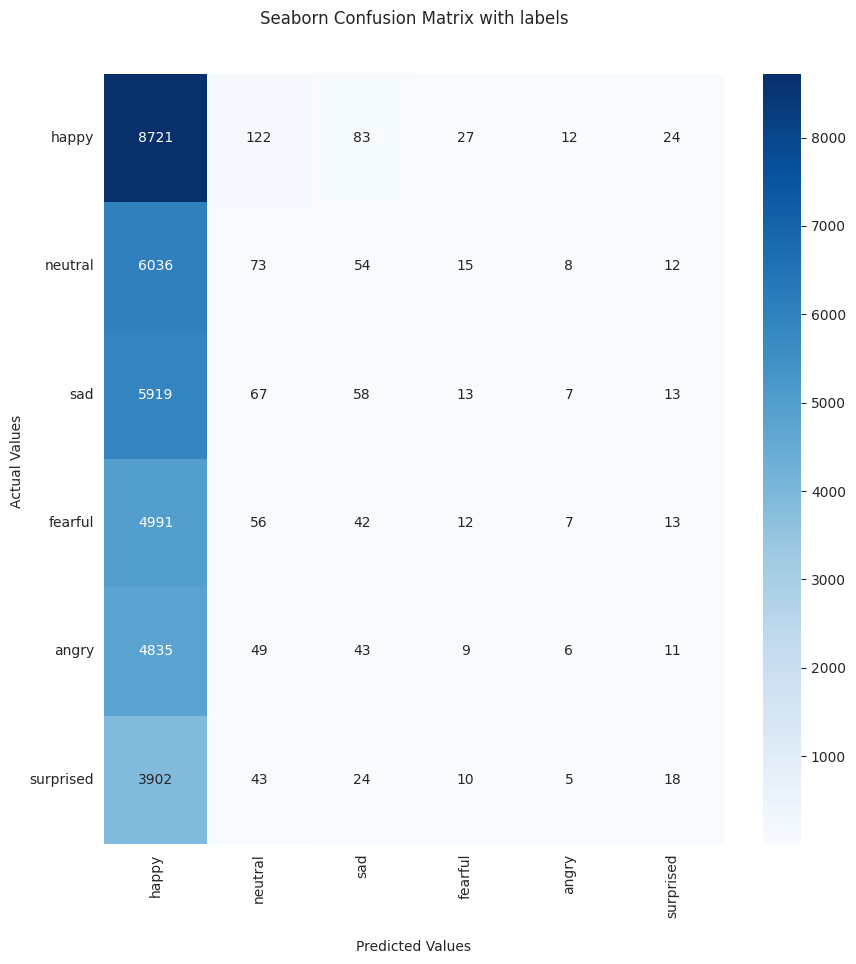

In [38]:
cf_matrix = confusion_matrix(preds['label'].map(automl.reader.class_mapping), OOFs)

plt.figure(figsize = (10, 10))

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt = 'd')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

inverse_class_mapping = {y: x for x,y in automl.reader.class_mapping.items()}
labels = [inverse_class_mapping[i] for i in range(len(inverse_class_mapping))]
ax.xaxis.set_ticklabels(labels, rotation = 90)
ax.yaxis.set_ticklabels(labels, rotation = 0)

plt.show()

In [ ]:
# te_pred = automl.predict(submission)
# print(f'Prediction for te_data:\n{te_pred}\nShape = {te_pred.shape}')

In [ ]:
# sub = submission[['image_id']]
# for i in range(10):
#     sub['pred_' + str(i)] = te_pred.data[:,i]
# 
# sub

In [ ]:
# sub = sub.groupby(['image_id']).mean().reset_index()
# sub

In [ ]:
# TEs = pd.Series(np.argmax(sub[['pred_' + str(i) for i in range(10)]].values, axis = 1)).map(inverse_class_mapping)
# TEs

In [ ]:
# sub['label'] = TEs
# sub[['image_id', 'label']].to_csv('LightAutoML_TabularCVAutoML_with_aug.csv', index = False)
# sub[['image_id', 'label']]

In [ ]:
# automl = TabularCVAutoML(task = task,
#                          timeout=3 * 3600,
#                          autocv_features={"embed_model": 'timm/tf_efficientnetv2_b0.in1k'},
#                          cpu_limit = 2,
#                          reader_params = {'cv': 5, 'random_state': 42})

In [ ]:
# oof_pred = automl.fit_predict(train_data, roles = roles, verbose = 3)

In [ ]:
# te_pred = automl.predict(submission)
# print(f'Prediction for te_data:\n{te_pred}\nShape = {te_pred.shape}')

In [ ]:
import joblib

In [ ]:
joblib.dump(automl, 'test_model.joblib')

In [39]:
from sklearn. metrics import f1_score
f1_score(preds['label'].map(automl.reader.class_mapping), OOFs, average="weighted")

0.11124155763609356